## Clustering Model

The algorithm is a kmeans method that groups the data into clusters based on sample similarity. Since we want to figure out whether samples from the same type of wine cluster together, no information on the type of wine is included in the training. Remember that clustering is an unsupervised learning task. The idea is to segment the samples based on similarity. Prior to clustering, the data is normalized. Several numbers of clusters are tried so as to identify a number that appears to be good enough, in this case is 3. The types of wine will take the values "0", "1", or "2".

### Import libraries and download dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings("ignore")


In [2]:
# Download CSV from link
url = 'https://storage.googleapis.com/the_public_bucket/wine-clustering.csv'
df = pd.read_csv(url)

# Show first rows of the dataset
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Selecting appropriate number of clusters


#### Choosing the number of clusters using the elbow method involves a balance between achieving good intra-cluster cohesion and avoiding excessive fragmentation of the data into too many clusters. From the plot below that shows SSE (Sum of Square Errors) as a function of total clusters, it seems it's a good idea to select 3 clusters. 

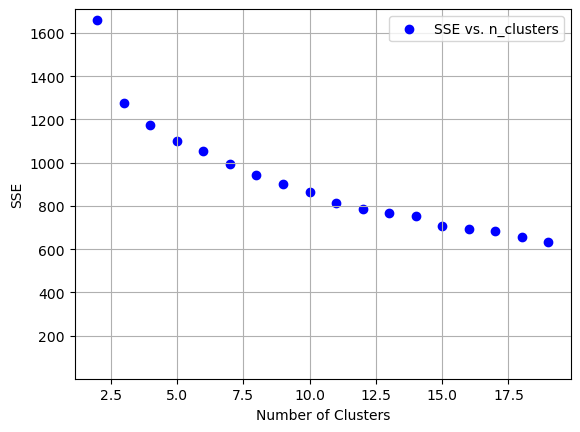

In [3]:
# Elbow method
X_cluster = StandardScaler().fit_transform(df)
#Finds best number of clusters using Inertia_ metric
SSE_data =[]
for n in range(2, 20):
    # Perform the clustering
    kmeans = KMeans(n_clusters = n)
    model = kmeans.fit(X_cluster)
    SSE_data.append(model.inertia_)
    
# Plot the SSE values to find the elbow that gives the best number of clusters
SSE_series = pd.Series(SSE_data)
x = np.arange(2., 20., 1.0)
plt.scatter(x, SSE_series, c="b", marker='o', label="SSE vs. n_clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.legend(loc=1)
plt.ylim(ymin=1)
plt.grid()
plt.show()

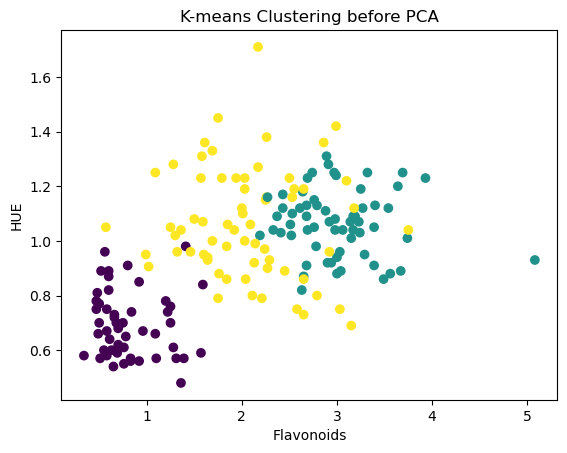

In [4]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Choose the number of clusters (you may need domain knowledge or use techniques like the elbow method to determine this)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Wine_Type'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters (assuming the data has only two features)
plt.scatter(df['Flavanoids'], df['Hue'], c=df['Wine_Type'], cmap='viridis')
plt.xlabel('Flavonoids')
plt.ylabel('HUE')
plt.title('K-means Clustering before PCA')
plt.show()

#### As we can see in the plot before using PCA, some type of wine are mixed in the middle of another clusters.

### Principal Component Analysis (PCA)


#### Principal Component Analysis (PCA) operates in an unsupervised manner as a dimensionality reduction procedure when we want to find a low-dimensional representation of the multivariate data and plot the observations in this low-dimensional space. Each of the n-observations in the dataset lives in p-dimensional space and each variable could be considered as a different p dimension. For p-dimensional datasets where p>3, it could be very difficult to visualize a multi-dimensional hyperspace. Therefore, we wish to develop a smaller number of artificial variables (called principal components) that will account for most of the variance in the observed variables that may be used as criterion variables in subsequent analyses. These new variables are a linear combination of the original p variables. The amount of variance retained by each principal component is measured by the so-called eigenvalue. The first principal component extracted accounts for a maximal amount of total variance in the observed variables. The second principal component will have two important features: a) it accounts for a maximal amount of variance in the dataset that was not accounted for by the first component and it will be correlated with some of the variables that did not display strong correlations with the first component; b) second feature is that it will be uncorrelated with the first component. In general, the main purpose of PCA is to: a) identify hidden patterns in a dataset; b) reduce the dimensionality of the data by removing the noise and redundancy in the data; c) identify correlated variables, d) data visualisation with corresponding 2D or 3D plots.

In [5]:
# Standardize the features
original_df = df.drop(columns=['Wine_Type'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(original_df)

# Apply PCA (Principal Component Analysis) for dimensionality reduction
pca = PCA(n_components=2)  
data_pca = pca.fit_transform(data_scaled)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Wine_Type'] = kmeans.fit_predict(data_pca)

In [6]:
# Print the principal components
print("Principal Components:")
print(pca.components_)

# Get the names of original features
original_df = df.drop(columns=['Wine_Type'])
original_feature_names = original_df.columns

# Print the most important features for each principal component
for i, component in enumerate(pca.components_):
    print(f"\nPrincipal Component {i+1}:")
    for j, feature_weight in enumerate(component):
        print(f"{original_feature_names[j]}: {feature_weight}")

Principal Components:
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]

Principal Component 1:
Alcohol: 0.14432939540601164
Malic_Acid: -0.24518758025722076
Ash: -0.002051061444370689
Ash_Alcanity: -0.23932040548753497
Magnesium: 0.14199204195298756
Total_Phenols: 0.39466084506663035
Flavanoids: 0.42293429671005944
Nonflavanoid_Phenols: -0.29853310295471536
Proanthocyanins: 0.3134294883076887
Color_Intensity: -0.08861670472472269
Hue: 0.29671456358638126
OD280: 0.37616741073871296
Proline: 0.28675222689680535

Principal Component 2:
Alcohol: -0.4836515478172144
Malic_Acid: -0.22493093462784464
Ash: -0.31606881402531484
Ash_Alcanity: 0.010590502288191453
Magnesium: -0.29963400323786166
Total_Phenols: -0.0650395118

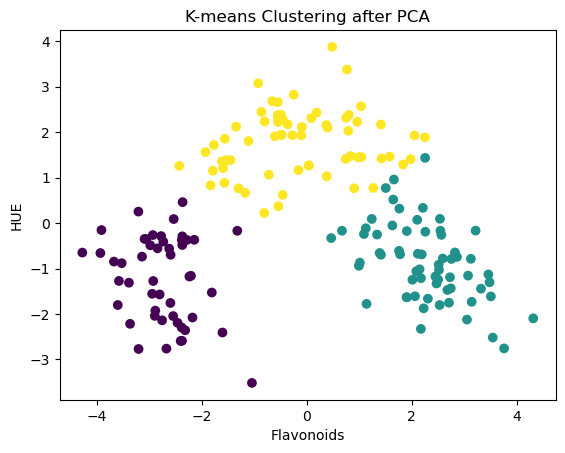

In [7]:
# Visualize the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Wine_Type'], cmap='viridis')
plt.xlabel('Flavonoids')
plt.ylabel('HUE')
plt.title('K-means Clustering after PCA')
plt.show()

#### In the plot after apply PCA we can see that the clusters are well separated and the type of wine are not mixed.

### Analysis and Results
 



#### Principal Component Analysis: The goal of PCA was to find the best low-dimensional representation of the variation in a multivariate wine dataset. A principal component analysis of the 'wine_clustering' extracted thirteen components. We examined the values to determine the number of principal components to be retained. The first two components were retained to visualize in a 2D diagram and compare the differences before and after applying the PCA method.
#### The K-means Clustering plot before PCA (Fig 1) clearly demonstrates that the first and second principal components do not separate the three types of wine effectively. Conversely, the K-means Clustering plot after PCA (Fig 2) shows significantly improved performance. 

#### Once applied our model and classified the type of wine, we will show the distribution of variables.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


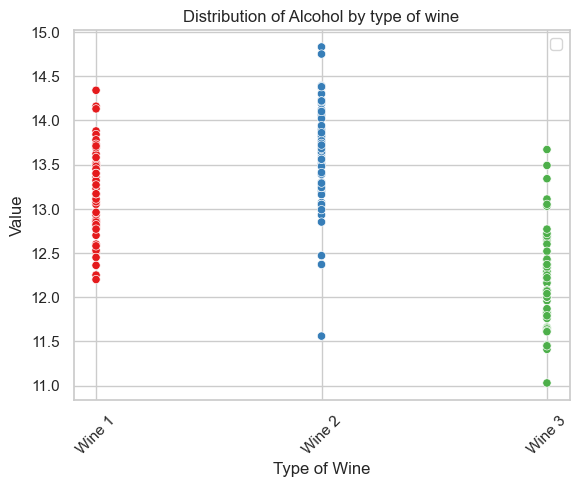

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


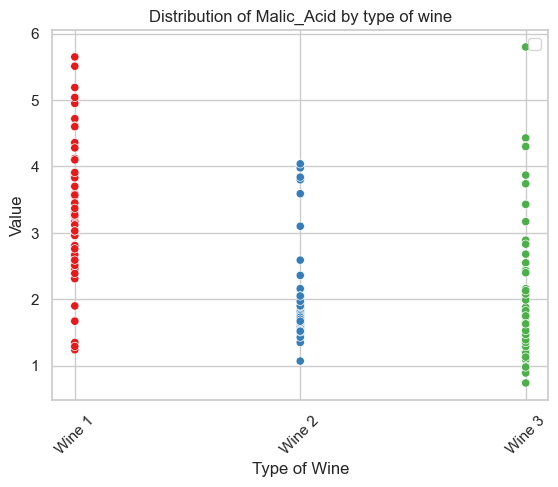

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


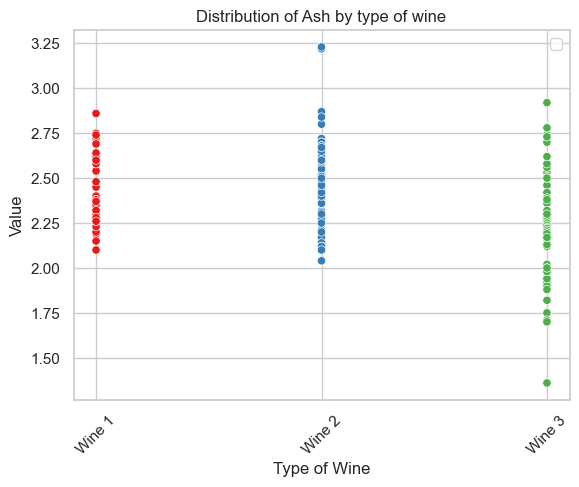

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


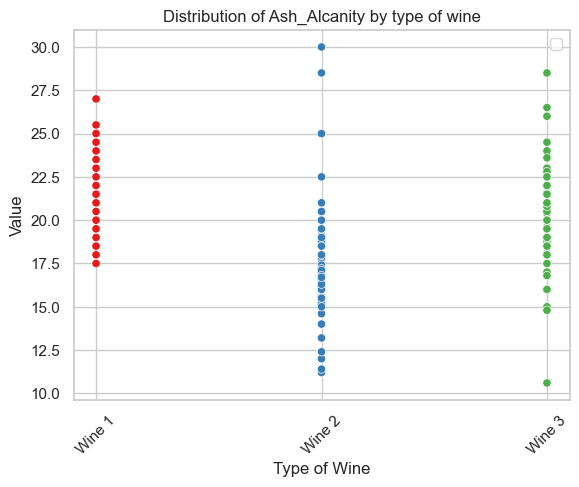

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


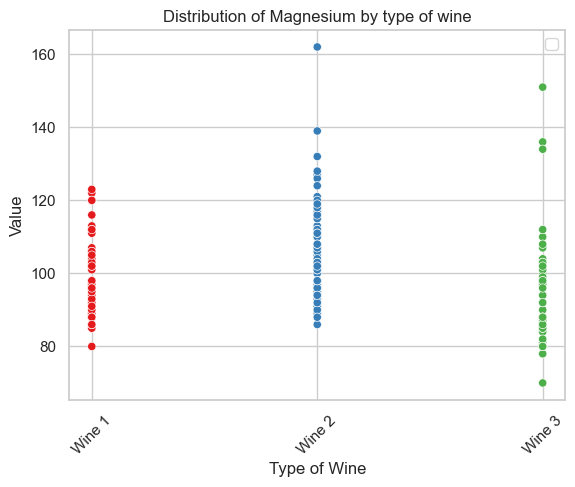

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


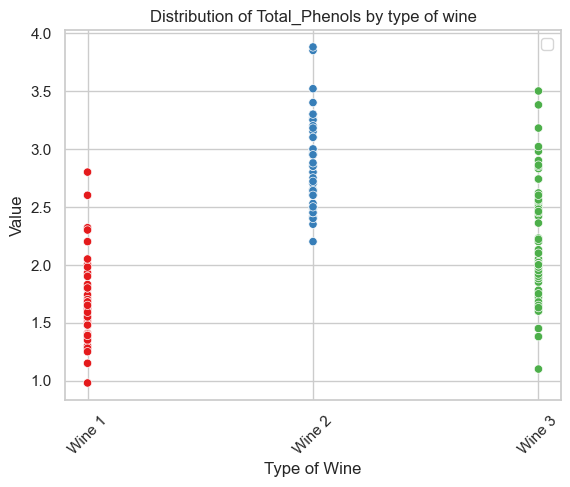

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


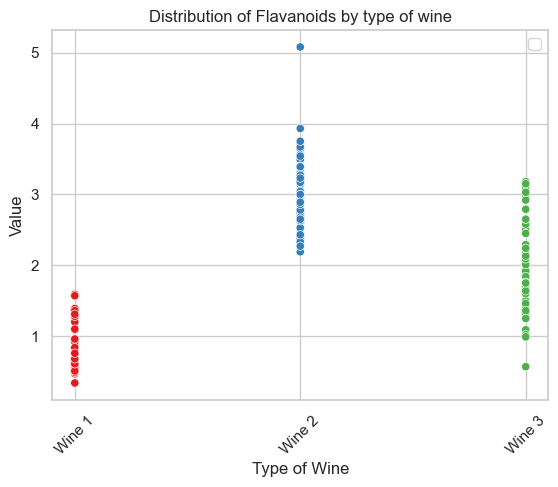

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


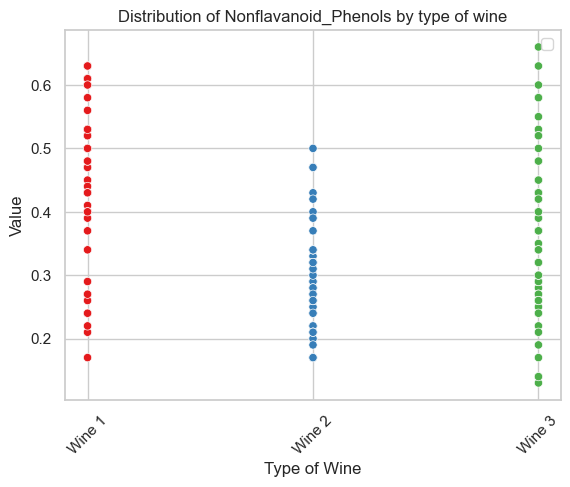

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


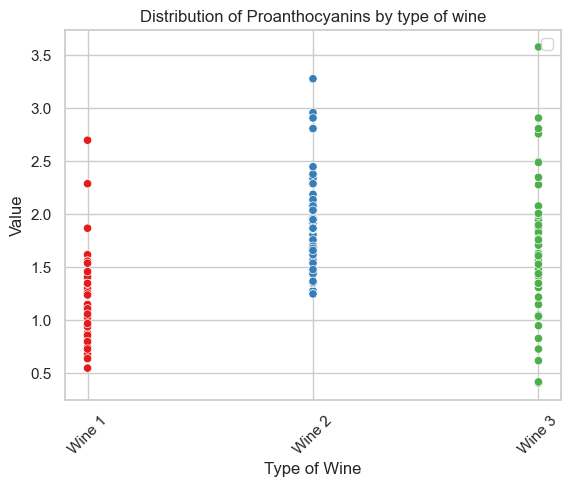

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


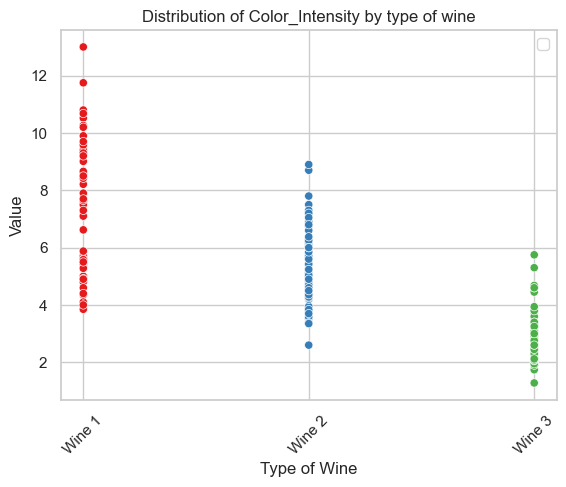

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


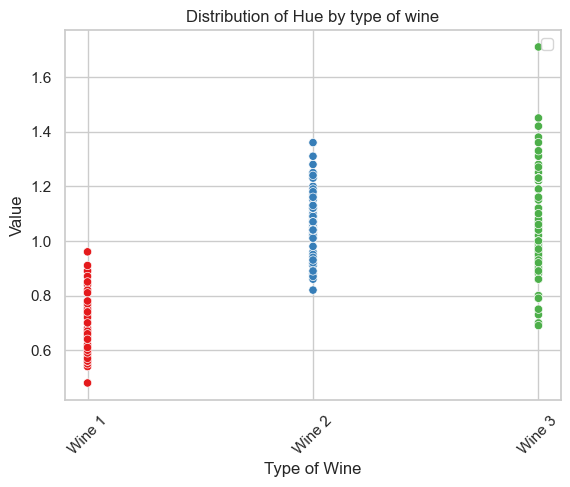

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


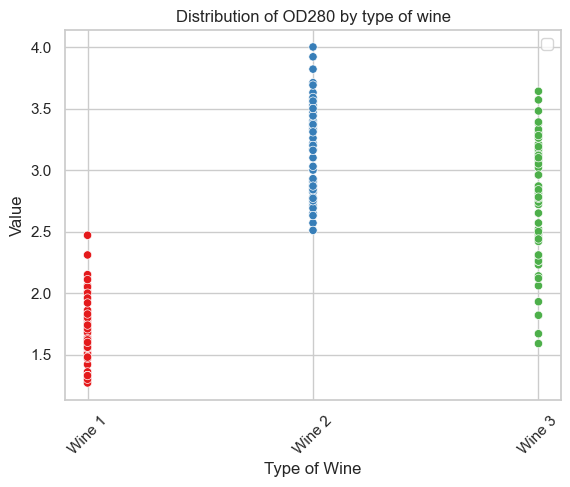

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


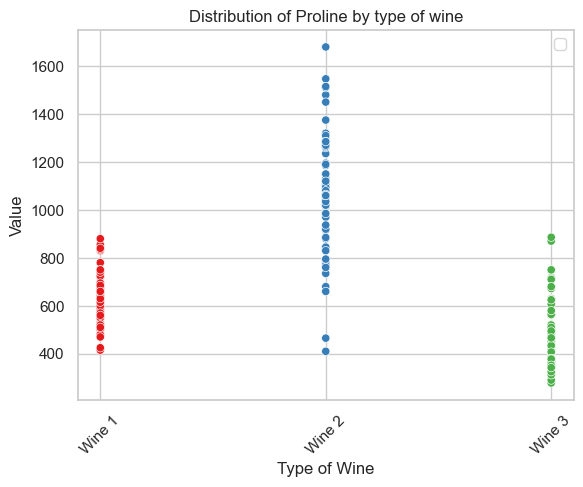

In [8]:
# Visualize the data using seaborn
sns.set(style="whitegrid")


# Obtain a list of columns except 'Wine_Type'
variables = df.columns.drop('Wine_Type')

# Create a scatter plot for each variable 
for variable in variables:
    sns.scatterplot(x='Wine_Type', y=variable, data=df, hue='Wine_Type', palette='Set1', legend=False)
    plt.title(f'Distribution of {variable} by type of wine')
    plt.xlabel('Type of Wine')
    plt.ylabel('Value')
    plt.xticks([0, 1, 2], ['Wine 1', 'Wine 2', 'Wine 3'])
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

#### As we can see, the two variables with the highest correlation to the type of wine are color intensity and flavonoids. Using the PCA method, these two variables can be used to differentiate between types of wine. For wine type 1, the color intensity typically ranges from 7 to 11 and the flavonoids 0.5 to 1.5, for wine type 2 the color intensity range from 8 to 3 and flavonoids from 2 to 3.5, and for wine type 3 the color intensity range from 1 to 4 and the flavonoids from 1 to 3.

#### The distribution of the ash with respect to each type of wine doesn't vary much. 